In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import numpy as np


Epoch 1/30
4/4 [==============================] - 5s 744ms/step - loss: 0.6911 - accuracy: 0.4800 - val_loss: 0.6929 - val_accuracy: 0.5084
Epoch 2/30
4/4 [==============================] - 2s 550ms/step - loss: 0.6796 - accuracy: 0.5900 - val_loss: 0.6925 - val_accuracy: 0.5092
Epoch 3/30
4/4 [==============================] - 2s 571ms/step - loss: 0.6676 - accuracy: 0.7000 - val_loss: 0.6920 - val_accuracy: 0.5152
Epoch 4/30
4/4 [==============================] - 2s 616ms/step - loss: 0.6479 - accuracy: 0.8100 - val_loss: 0.6915 - val_accuracy: 0.5191
Epoch 5/30
4/4 [==============================] - 2s 569ms/step - loss: 0.6097 - accuracy: 0.8400 - val_loss: 0.6965 - val_accuracy: 0.5093
Epoch 6/30
4/4 [==============================] - 2s 485ms/step - loss: 0.5470 - accuracy: 0.7100 - val_loss: 0.7337 - val_accuracy: 0.5063
Epoch 7/30
4/4 [==============================] - 2s 549ms/step - loss: 0.4630 - accuracy: 0.8000 - val_loss: 0.6896 - val_accuracy: 0.5439
Epoch 8/30
4/4 [====

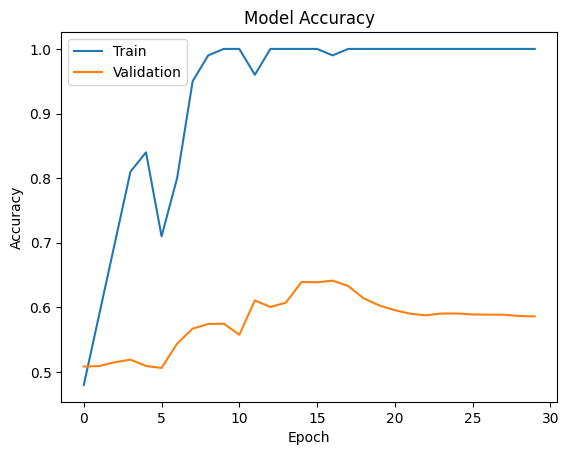

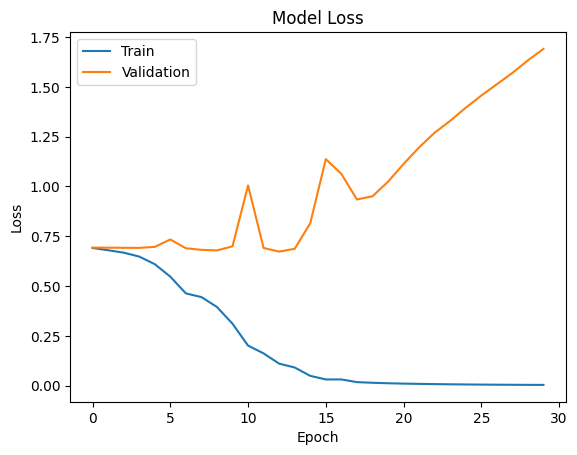

Test accuracy: 58.60%


In [3]:
max_features = 10000  # consider only top 10,000 words
maxlen = 150  # cutoff reviews after 150 words
batch_size = 32
embedding_dim = 100
lstm_units = 64
epochs = 30

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = train_data[:100]
train_labels = train_labels[:100]

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                    validation_split=0.2, validation_data=(test_data[:10000], test_labels[:10000]))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

scores = model.evaluate(test_data[:10000], test_labels[:10000], verbose=0)
print(f'Test accuracy: {scores[1]*100:.2f}%')


File ‘glove.6B.zip’ already there; not retrieving.

Archive:  glove.6B.zip


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 17s 5s/step - loss: 0.6881 - acc: 0.5000 - val_loss: 0.7454 - val_acc: 0.5027
Epoch 2/30
4/4 [==============================] - 14s 4s/step - loss: 0.6591 - acc: 0.5600 - val_loss: 0.7364 - val_acc: 0.5029
Epoch 3/30
4/4 [==============================] - 14

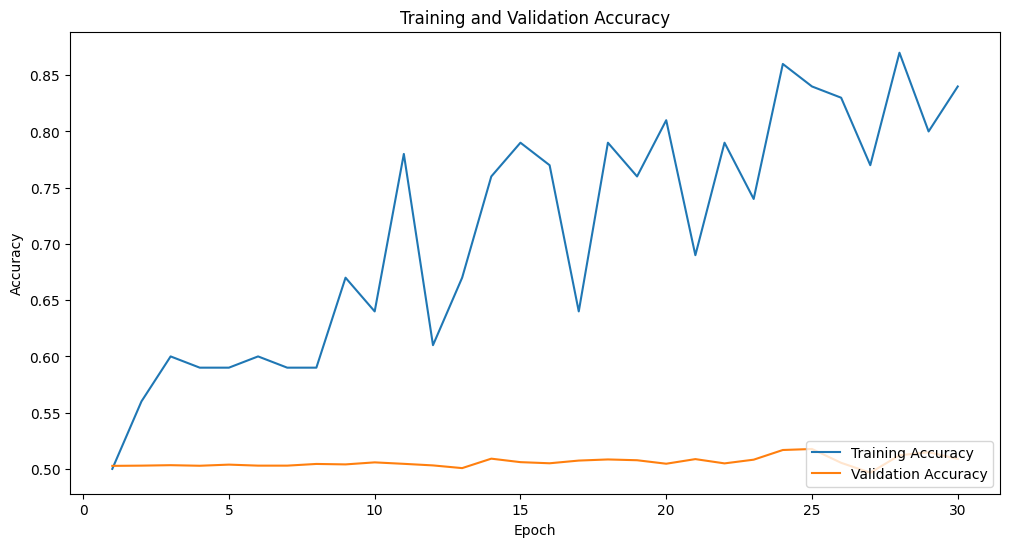

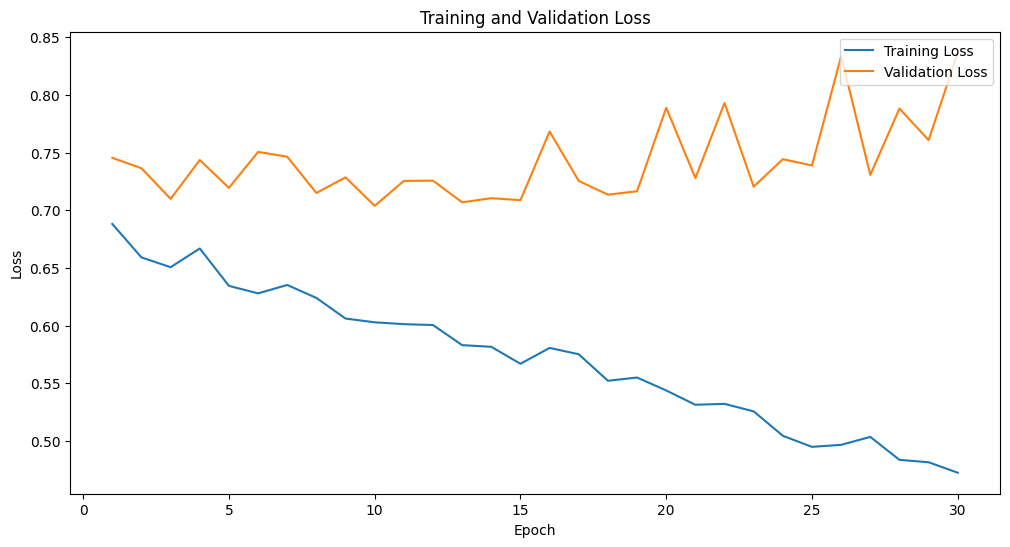

Training sample size: 100


In [4]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

# Set parameters
max_features = 10000  # Consider only the top 10,000 words
max_len = 150         # Cutoff reviews after 150 words
batch_size = 32       # Batch size
epochs = 30           # Number of epochs

# Load the data and restrict training samples to 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = x_train[:100]
y_train = y_train[:100]

# Pad sequences to a fixed length and truncate longer sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Load pre-trained word embeddings
!wget -nc https://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip
glove_dir = './glove.6B/'
embeddings_index = {}
with open(glove_dir + 'glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in imdb.get_word_index().items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compile the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Fit the model and validate on 10,000 samples
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test[:10000], y_test[:10000]))

# Evaluate the model on the test data
results = model.evaluate(x_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs_range = range(1, epochs+1)
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Print the training sample size
print('Training sample size:', len(x_train))


Training with 200 samples...
Epoch 1/30
4/4 [==============================] - 13s 4s/step - loss: 0.0041 - acc: 1.0000 - val_loss: 2.0534 - val_acc: 0.5198
Epoch 2/30
4/4 [==============================] - 13s 4s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.1669 - val_acc: 0.5206
Epoch 3/30
4/4 [==============================] - 13s 4s/step - loss: 0.0082 - acc: 1.0000 - val_loss: 2.0727 - val_acc: 0.5153
Epoch 4/30
4/4 [==============================] - 13s 4s/step - loss: 0.0108 - acc: 1.0000 - val_loss: 1.8820 - val_acc: 0.5141
Epoch 5/30
4/4 [==============================] - 13s 4s/step - loss: 0.0089 - acc: 1.0000 - val_loss: 2.1079 - val_acc: 0.5077
Epoch 6/30
4/4 [==============================] - 13s 4s/step - loss: 0.0635 - acc: 0.9900 - val_loss: 1.9110 - val_acc: 0.5169
Epoch 7/30
4/4 [==============================] - 13s 4s/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.9532 - val_acc: 0.5121
Epoch 8/30
4/4 [==============================] - 13s 4s/step - loss: 0.004

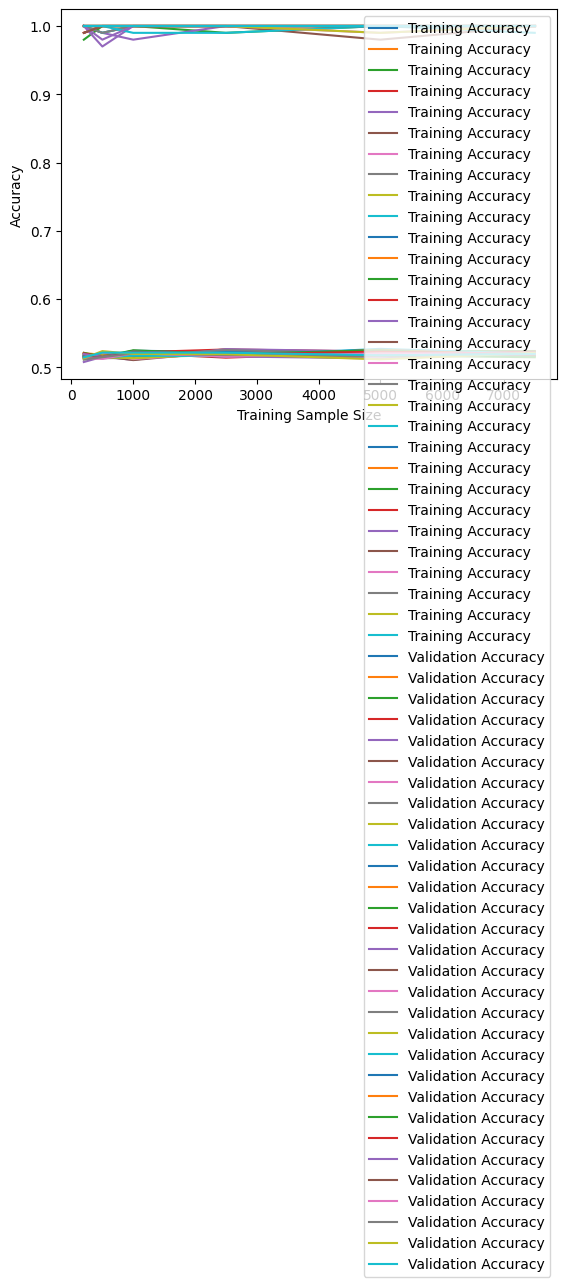

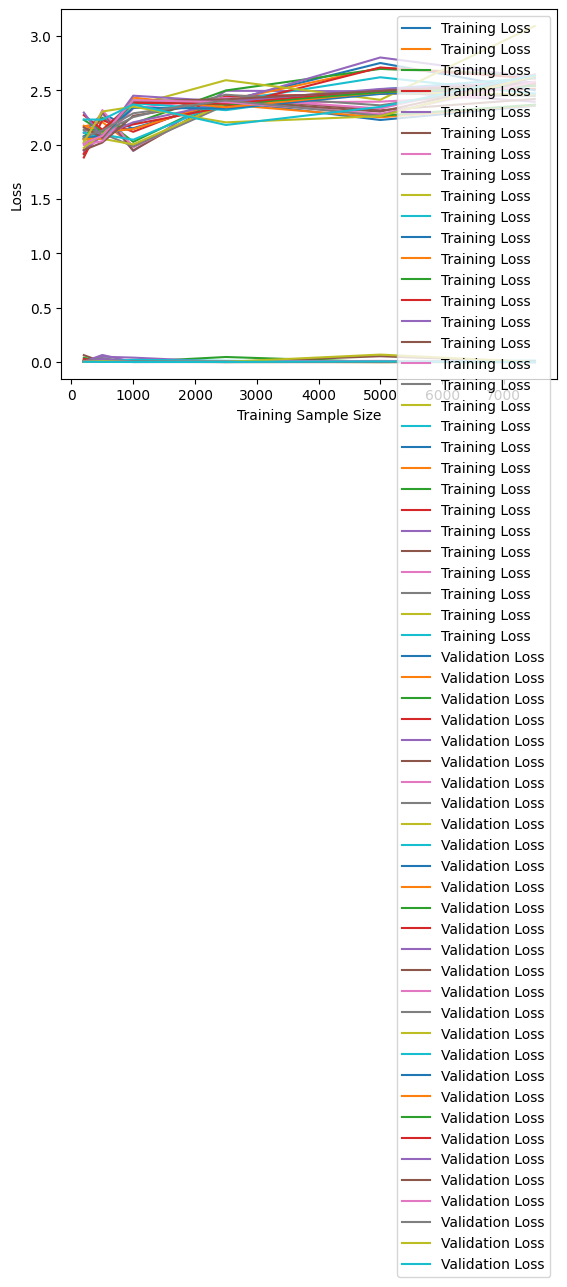

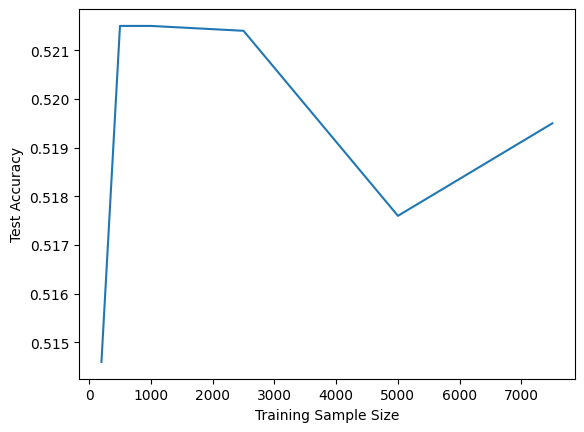

|   Training Sample Size |   Test Accuracy |
|-----------------------:|----------------:|
|                    200 |          0.5146 |
|                    500 |          0.5215 |
|                   1000 |          0.5215 |
|                   2500 |          0.5214 |
|                   5000 |          0.5176 |
|                   7500 |          0.5195 |


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

train_sizes = [200, 500, 1000, 2500, 5000, 7500]
train_accs = []
val_accs = []
train_losses = []
val_losses = []
test_accs = []

for size in train_sizes:
    print(f'Training with {size} samples...')
    train_data_subset = train_data[:size]
    train_labels_subset = train_labels[:size]

    history = model.fit(train_data_subset, train_labels_subset, batch_size=batch_size, epochs=epochs, 
                        validation_split=0.2, 
                        validation_data=(test_data[:10000], test_labels[:10000]))

    train_accs.append(history.history['acc'])
    val_accs.append(history.history['val_acc'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    scores = model.evaluate(test_data[:10000], test_labels[:10000], verbose=0)
    test_accs.append(scores[1])

    print(f'Test accuracy with {size} training samples: {scores[1]*100:.2f}%')

# plot training and validation accuracies
plt.plot(train_sizes, train_accs, label='Training Accuracy')
plt.plot(train_sizes, val_accs, label='Validation Accuracy')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot training and validation losses
plt.plot(train_sizes, train_losses, label='Training Loss')
plt.plot(train_sizes, val_losses, label='Validation Loss')
plt.xlabel('Training Sample Size')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot test accuracies for each training sample
plt.plot(train_sizes, test_accs)
plt.xlabel('Training Sample Size')
plt.ylabel('Test Accuracy')
plt.show()

# create table for test accuracies
results_df = pd.DataFrame({'Training Sample Size': train_sizes, 'Test Accuracy': test_accs})
print(results_df.to_markdown(index=False))
